In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import pandas as pd

In [3]:
x_train = np.loadtxt('input.csv', delimiter=',')
y_train = np.loadtxt('labels.csv', delimiter=',')

x_test = np.loadtxt('input_test.csv', delimiter=',')
y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [4]:
x_train = x_train.reshape(len(x_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train),1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

x_train = x_train/255.0 #This is done for scaling
x_test = x_test/255.0

In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


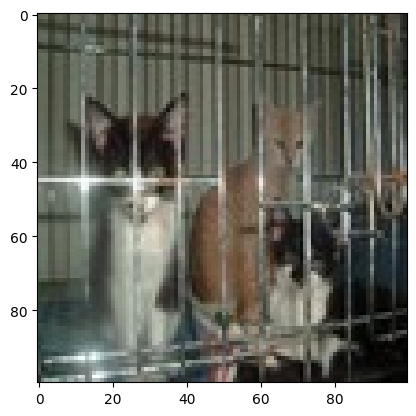

In [6]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, len(x_train))
plt.imshow(x_train[idx, :])
plt.show()

In [7]:
model = Sequential([ #Layers will be stacked in a sequence
        Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
        MaxPooling2D((2,2)),
        
        Conv2D(32, (3,3), activation = 'relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(64, activation = 'relu'),
        Dense(1, activation = 'sigmoid')
]) 

In [8]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
32/32 [==============================] - 14s 380ms/step - loss: 0.6934 - accuracy: 0.5445
Epoch 2/5
32/32 [==============================] - 12s 375ms/step - loss: 0.6399 - accuracy: 0.6460
Epoch 3/5
32/32 [==============================] - 12s 375ms/step - loss: 0.5826 - accuracy: 0.6855
Epoch 4/5
32/32 [==============================] - 14s 449ms/step - loss: 0.5107 - accuracy: 0.7560
Epoch 5/5
32/32 [==============================] - 13s 405ms/step - loss: 0.4724 - accuracy: 0.7715


In [10]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 1s 53ms/step - loss: 0.5837 - accuracy: 0.6950


[0.5836646556854248, 0.6949999928474426]

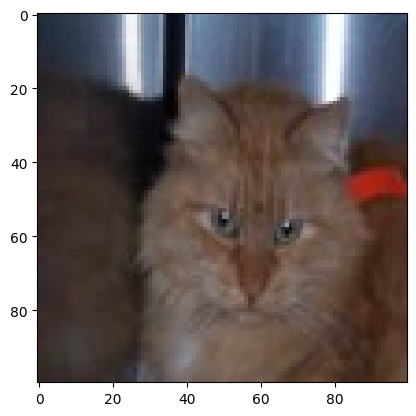

1/1 [==============================] - 0s 157ms/step
cat


In [11]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()

y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print(pred)